In [1]:
%matplotlib inline

from PIL import Image
import glob
import pandas as pd
import matplotlib.pyplot as plt
good_pop = glob.glob('../screenshots/good/*.png')

bad_pop = glob.glob('../screenshots/bad/*.png')
print(len(good_pop), len(bad_pop))

460 239


In [2]:
from collections import Counter
from itertools import product
import colorsys
def normalize_pixel(pixel, num_color_steps=16):
    factor = (256//num_color_steps)
    return tuple(factor*(int((c)/factor)) for c in pixel)

def extract_features(image, num_channel_values=8):
    pixels_array = image.load()
    w, h = image.size
    
    color_counts = Counter(normalize_pixel(pixels_array[x,y],num_channel_values) for x,y in product(range(w), range(h)))
    num_pixels = w*h
    pixel_freqs = dict()
    common_pixel_f = (0,0)
    for k,v in color_counts.items():
        pixel_freqs.update({str(k):v/num_pixels})
        if v > common_pixel_f[1]:
            common_pixel = (k,v)
#     return pixel_freqs
#     print(color_counts.most_common(10))
    if len(color_counts) > 1:
        major_hue = colorsys.rgb_to_hsv(*(color_counts.most_common(2)[1][0]))[0]
    else:
        major_hue = colorsys.rgb_to_hsv(*(color_counts.most_common(2)[0][0]))[0]
    return {
        'num_colors': len(color_counts),
        'major_hue': major_hue,
        'empty_proportion': color_counts.most_common(1)[0][1]/(w*h),
        
    }

def extract_file(path):
    try:
        return extract_features(Image.open(path))
    except Exception as e:
        print("Error with path={}\n{}".format(path,e))
        return None

extract_features(Image.open(good_pop[0]))

{'empty_proportion': 0.9937070794753087,
 'major_hue': 0.8333333333333334,
 'num_colors': 39}

In [3]:
from multiprocessing import Pool
import time
pool = Pool()

In [4]:
ti = time.time()
bad_set = list(pool.map(extract_file, bad_pop))
tf = time.time()
print(tf-ti)
bad_frame = pd.DataFrame(bad_set)
bad_frame.describe()

294.8338255882263


,empty_proportion,major_hue,num_colors
count,239.000000,239.000000,239.000000
mean,0.983433,0.442503,101.694561
std,0.015105,0.296501,65.519537
min,0.940027,0.000000,1.000000
25%,0.972331,0.166667,38.500000
50%,0.984789,0.500000,105.000000
75%,0.997365,0.666667,152.000000
max,1.000000,0.972222,271.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdd5d091d0>]], dtype=object)

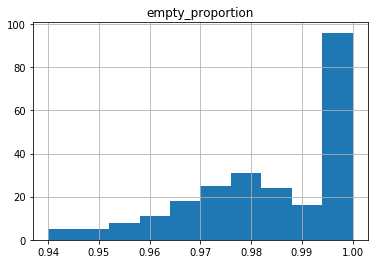

In [5]:
bad_frame.hist(column='empty_proportion')

In [6]:
ti = time.time()
good_set = list(pool.map(extract_file, good_pop))
tf = time.time()
print(tf-ti)
good_frame = pd.DataFrame(good_set)
good_frame.describe()

620.8087868690491


,empty_proportion,major_hue,num_colors
count,460.000000,460.000000,460.000000
mean,0.989455,0.442941,87.050000
std,0.006091,0.296414,39.565171
min,0.961693,0.000000,20.000000
25%,0.986435,0.166667,56.000000
50%,0.990604,0.500000,82.000000
75%,0.994136,0.666667,110.000000
max,0.998829,0.944444,257.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7efdd5b3a908>]], dtype=object)

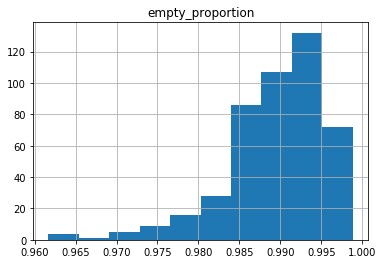

In [7]:
good_frame.hist(column='empty_proportion')